In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.2f}'.format)

In [4]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

In [8]:
# Loading Data

In [6]:
df = pd.read_csv(r"C:\Users\Lenovo\Downloads\synthetic_fraud_dataset.csv")

In [7]:
print(f"\n✓ Data loaded successfully!")
print(f"  Total Rows: {len(df):,}")
print(f"  Total Columns: {len(df.columns)}")
print(f"  Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")



✓ Data loaded successfully!
  Total Rows: 10,000
  Total Columns: 10
  Memory Usage: 2.06 MB


# Initial Data Exploration

In [13]:
print("\nColumn Names and Data Types:")
print("-" * 80)
for i, (col, dtype) in enumerate(zip(df.columns, df.dtypes), 1):
    print(f"{i}. {col:25} → {dtype}")

print("\nFirst 5 Rows:")
print("-" * 80)
print(df.head())

print("\nLast 5 Rows:")
print("-" * 80)
print(df.tail())

print("\nDataset Shape:")
print(f"  Rows × Columns: {df.shape[0]} × {df.shape[1]}")


Column Names and Data Types:
--------------------------------------------------------------------------------
1. transaction_id            → int64
2. user_id                   → int64
3. amount                    → float64
4. transaction_type          → object
5. merchant_category         → object
6. country                   → object
7. hour                      → int64
8. device_risk_score         → float64
9. ip_risk_score             → float64
10. is_fraud                  → int64

First 5 Rows:
--------------------------------------------------------------------------------
   transaction_id  user_id  amount transaction_type merchant_category country  \
0            9608      363 4922.59              ATM            Travel      TR   
1             456      692   48.02               QR              Food      US   
2            4747      587  136.88           Online            Travel      TR   
3            6934      445   80.53              POS          Clothing      TR   
4       

In [14]:
# Missing Value

In [15]:
print("\nMissing Values Analysis:")
print("-" * 80)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_pct
})
print(missing_df)

if missing.sum() == 0:
    print("\n✓ Excellent! No missing values found in the dataset.")
else:
    print(f"\n⚠ Warning: Found {missing.sum()} missing values across columns.")


Missing Values Analysis:
--------------------------------------------------------------------------------
                   Missing_Count  Percentage
transaction_id                 0        0.00
user_id                        0        0.00
amount                         0        0.00
transaction_type               0        0.00
merchant_category              0        0.00
country                        0        0.00
hour                           0        0.00
device_risk_score              0        0.00
ip_risk_score                  0        0.00
is_fraud                       0        0.00

✓ Excellent! No missing values found in the dataset.


In [16]:
# Duplicate rows

In [17]:
duplicates = df.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")
if duplicates == 0:
    print("✓ No duplicate rows found.")
else:
    print(f"⚠ Found {duplicates} duplicate rows.")



Duplicate Rows: 0
✓ No duplicate rows found.


In [18]:
# Data types summary

In [19]:
print("\nData Types Summary:")
print(df.dtypes.value_counts())



Data Types Summary:
int64      4
float64    3
object     3
Name: count, dtype: int64


In [20]:
# Unique values per column

In [21]:
print("\nUnique Values Count:")
print("-" * 80)
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"  {col:25} → {unique_count:,} unique values")


Unique Values Count:
--------------------------------------------------------------------------------
  transaction_id            → 10,000 unique values
  user_id                   → 1,000 unique values
  amount                    → 9,639 unique values
  transaction_type          → 4 unique values
  merchant_category         → 5 unique values
  country                   → 6 unique values
  hour                      → 24 unique values
  device_risk_score         → 10,000 unique values
  ip_risk_score             → 10,000 unique values
  is_fraud                  → 2 unique values


# Statistical Summary

In [22]:
print("\nNumeric Columns Statistics:")
print("-" * 80)
print(df.describe())

print("\nCategorical Columns Overview:")
print("-" * 80)
categorical_cols = ['transaction_type', 'merchant_category', 'country']
for col in categorical_cols:
    if col in df.columns:
        print(f"\n{col}:")
        print(df[col].value_counts().head())


Numeric Columns Statistics:
--------------------------------------------------------------------------------
       transaction_id  user_id   amount     hour  device_risk_score  \
count        10000.00 10000.00 10000.00 10000.00           10000.00   
mean          4999.50   500.06   178.14    14.25               0.18   
std           2886.90   288.33   531.65     5.35               0.18   
min              0.00     0.00     1.00     0.00               0.00   
25%           2499.75   247.00    65.08    10.00               0.08   
50%           4999.50   503.00   101.69    14.00               0.16   
75%           7499.25   750.25   138.28    19.00               0.23   
max           9999.00   999.00 11628.21    23.00               1.00   

       ip_risk_score  is_fraud  
count       10000.00  10000.00  
mean            0.18      0.05  
std             0.18      0.22  
min             0.00      0.00  
25%             0.08      0.00  
50%             0.16      0.00  
75%             0.2

# Fraud Analysis - Key Metrics

In [23]:
# Basic fraud statistics
fraud_count = df['is_fraud'].sum()
legit_count = len(df) - fraud_count
fraud_rate = (fraud_count / len(df)) * 100

print("\n📊 Overall Fraud Metrics:")
print("-" * 80)
print(f"  Total Transactions: {len(df):,}")
print(f"  Fraudulent Transactions: {fraud_count:,}")
print(f"  Legitimate Transactions: {legit_count:,}")
print(f"  Fraud Rate: {fraud_rate:.2f}%")


📊 Overall Fraud Metrics:
--------------------------------------------------------------------------------
  Total Transactions: 10,000
  Fraudulent Transactions: 500
  Legitimate Transactions: 9,500
  Fraud Rate: 5.00%


In [24]:
# Financial impact
total_amount = df['amount'].sum()
fraud_amount = df[df['is_fraud'] == 1]['amount'].sum()
legit_amount = df[df['is_fraud'] == 0]['amount'].sum()
fraud_amount_pct = (fraud_amount / total_amount) * 100

print("\n💰 Financial Impact:")
print("-" * 80)
print(f"  Total Transaction Volume: ${total_amount:,.2f}")
print(f"  Fraudulent Amount: ${fraud_amount:,.2f}")
print(f"  Legitimate Amount: ${legit_amount:,.2f}")
print(f"  Fraud Amount %: {fraud_amount_pct:.2f}%")


💰 Financial Impact:
--------------------------------------------------------------------------------
  Total Transaction Volume: $1,781,427.63
  Fraudulent Amount: $828,788.99
  Legitimate Amount: $952,638.64
  Fraud Amount %: 46.52%


In [25]:
# Average amounts
avg_fraud_amount = df[df['is_fraud'] == 1]['amount'].mean()
avg_legit_amount = df[df['is_fraud'] == 0]['amount'].mean()

print("\n💵 Average Transaction Amounts:")
print("-" * 80)
print(f"  Fraudulent Transactions: ${avg_fraud_amount:,.2f}")
print(f"  Legitimate Transactions: ${avg_legit_amount:,.2f}")
print(f"  Difference: ${abs(avg_fraud_amount - avg_legit_amount):,.2f}")


💵 Average Transaction Amounts:
--------------------------------------------------------------------------------
  Fraudulent Transactions: $1,657.58
  Legitimate Transactions: $100.28
  Difference: $1,557.30


In [31]:
# Fraud Transaction by Type

In [26]:
fraud_by_type = df.groupby('transaction_type').agg({
    'is_fraud': ['sum', 'count', 'mean'],
    'amount': ['sum', 'mean']
})

fraud_by_type.columns = ['Fraud_Count', 'Total_Trans', 'Fraud_Rate', 'Total_Amount', 'Avg_Amount']
fraud_by_type['Fraud_Rate'] = fraud_by_type['Fraud_Rate'] * 100
fraud_by_type = fraud_by_type.sort_values('Fraud_Rate', ascending=False)

print("\nFraud Analysis by Transaction Type:")
print("-" * 80)
print(fraud_by_type)


Fraud Analysis by Transaction Type:
--------------------------------------------------------------------------------
                  Fraud_Count  Total_Trans  Fraud_Rate  Total_Amount  \
transaction_type                                                       
ATM                       138         2529        5.46     474817.57   
Online                    126         2397        5.26     412379.77   
QR                        120         2506        4.79     438882.71   
POS                       116         2568        4.52     455347.58   

                  Avg_Amount  
transaction_type              
ATM                   187.75  
Online                172.04  
QR                    175.13  
POS                   177.32  


In [27]:
# Identify highest risk type
highest_risk_type = fraud_by_type['Fraud_Rate'].idxmax()
highest_risk_rate = fraud_by_type['Fraud_Rate'].max()
print(f"\n⚠ HIGHEST RISK: {highest_risk_type} with {highest_risk_rate:.2f}% fraud rate")



⚠ HIGHEST RISK: ATM with 5.46% fraud rate


In [32]:
# Fraud by Merchant Category

In [28]:
fraud_by_merchant = df.groupby('merchant_category').agg({
    'is_fraud': ['sum', 'count', 'mean'],
    'amount': 'sum'
})

fraud_by_merchant.columns = ['Fraud_Count', 'Total_Trans', 'Fraud_Rate', 'Total_Amount']
fraud_by_merchant['Fraud_Rate'] = fraud_by_merchant['Fraud_Rate'] * 100
fraud_by_merchant = fraud_by_merchant.sort_values('Fraud_Rate', ascending=False)

print("\nFraud Analysis by Merchant Category:")
print("-" * 80)
print(fraud_by_merchant)

highest_risk_merchant = fraud_by_merchant['Fraud_Rate'].idxmax()
print(f"\n⚠ HIGHEST RISK MERCHANT: {highest_risk_merchant}")


Fraud Analysis by Merchant Category:
--------------------------------------------------------------------------------
                   Fraud_Count  Total_Trans  Fraud_Rate  Total_Amount
merchant_category                                                    
Clothing                   109         1982        5.50     352375.66
Travel                     106         2015        5.26     384223.53
Electronics                 98         2007        4.88     339754.36
Grocery                     95         1973        4.82     367029.97
Food                        92         2023        4.55     338044.11

⚠ HIGHEST RISK MERCHANT: Clothing


In [29]:
# FRAUD BY COUNTRY

In [30]:
fraud_by_country = df.groupby('country').agg({
    'is_fraud': ['sum', 'count', 'mean'],
    'amount': 'sum'
})

fraud_by_country.columns = ['Fraud_Count', 'Total_Trans', 'Fraud_Rate', 'Total_Amount']
fraud_by_country['Fraud_Rate'] = fraud_by_country['Fraud_Rate'] * 100
fraud_by_country = fraud_by_country.sort_values('Fraud_Rate', ascending=False)

print("\nFraud Analysis by Country:")
print("-" * 80)
print(fraud_by_country)


Fraud Analysis by Country:
--------------------------------------------------------------------------------
         Fraud_Count  Total_Trans  Fraud_Rate  Total_Amount
country                                                    
NG               100          100      100.00     140726.43
US                97         2050        4.73     369097.47
UK                85         1965        4.33     322963.11
TR                75         1928        3.89     331149.82
FR                74         2027        3.65     317719.01
DE                69         1930        3.58     299771.78


In [33]:
# Top 5 countries by fraud count
print("\nTop 5 Countries by Fraud Count:")
print(fraud_by_country.nlargest(5, 'Fraud_Count')[['Fraud_Count', 'Fraud_Rate']])


Top 5 Countries by Fraud Count:
         Fraud_Count  Fraud_Rate
country                         
NG               100      100.00
US                97        4.73
UK                85        4.33
TR                75        3.89
FR                74        3.65


In [36]:
# Amount Range Analysis
bins = [0, 100, 500, 1000, 5000, 10000, np.inf]
labels = ['0-100', '100-500', '500-1K', '1K-5K', '5K-10K', '10K+']
df['amount_range'] = pd.cut(df['amount'], bins=bins, labels=labels)

fraud_by_amount = df.groupby('amount_range').agg({
    'is_fraud': ['sum', 'count', 'mean']
})

fraud_by_amount.columns = ['Fraud_Count', 'Total_Trans', 'Fraud_Rate']
fraud_by_amount['Fraud_Rate'] = fraud_by_amount['Fraud_Rate'] * 100

print("\nFraud Distribution by Amount Range:")
print("-" * 80)
print(fraud_by_amount)


Fraud Distribution by Amount Range:
--------------------------------------------------------------------------------
              Fraud_Count  Total_Trans  Fraud_Rate
amount_range                                      
0-100                 136         4862        2.80
100-500                27         4801        0.56
500-1K                 58           58      100.00
1K-5K                 255          255      100.00
5K-10K                 21           21      100.00
10K+                    3            3      100.00


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10148\191684001.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_amount = df.groupby('amount_range').agg({


In [37]:
# Amount statistics comparison
print("\nAmount Statistics - Fraud vs Legitimate:")
print("-" * 80)
print("\nFRAUDULENT Transactions:")
print(df[df['is_fraud'] == 1]['amount'].describe())
print("\nLEGITIMATE Transactions:")
print(df[df['is_fraud'] == 0]['amount'].describe())


Amount Statistics - Fraud vs Legitimate:
--------------------------------------------------------------------------------

FRAUDULENT Transactions:
count     500.00
mean     1657.58
std      1818.95
min        10.00
25%        22.17
50%      1220.56
75%      2508.13
max     11628.21
Name: amount, dtype: float64

LEGITIMATE Transactions:
count   9500.00
mean     100.28
std       49.50
min        1.00
25%       65.18
50%      100.29
75%      134.54
max      277.20
Name: amount, dtype: float64


In [38]:
# TEMPORAL ANALYSIS

In [39]:
fraud_by_hour = df.groupby('hour').agg({
    'is_fraud': ['sum', 'count', 'mean']
})

fraud_by_hour.columns = ['Fraud_Count', 'Total_Trans', 'Fraud_Rate']
fraud_by_hour['Fraud_Rate'] = fraud_by_hour['Fraud_Rate'] * 100

print("\nFraud Analysis by Hour of Day:")
print("-" * 80)
print(fraud_by_hour)


Fraud Analysis by Hour of Day:
--------------------------------------------------------------------------------
      Fraud_Count  Total_Trans  Fraud_Rate
hour                                      
0              16           16      100.00
1              11           11      100.00
2              16           16      100.00
3              18           18      100.00
4             117          117      100.00
5              15           15      100.00
6              22          560        3.93
7              15          545        2.75
8              19          530        3.58
9              15          541        2.77
10             17          560        3.04
11             19          534        3.56
12             22          541        4.07
13             23          584        3.94
14             10          522        1.92
15             15          553        2.71
16             15          555        2.70
17             12          564        2.13
18             22          

In [40]:
# Time periods
df['time_period'] = pd.cut(df['hour'], 
                            bins=[0, 6, 12, 18, 24], 
                            labels=['Night (0-6)', 'Morning (6-12)', 'Afternoon (12-18)', 'Evening (18-24)'],
                            include_lowest=True)

fraud_by_period = df.groupby('time_period').agg({
    'is_fraud': ['sum', 'count', 'mean']
})
fraud_by_period.columns = ['Fraud_Count', 'Total_Trans', 'Fraud_Rate']
fraud_by_period['Fraud_Rate'] = fraud_by_period['Fraud_Rate'] * 100

print("\nFraud by Time Period:")
print("-" * 80)
print(fraud_by_period)


Fraud by Time Period:
--------------------------------------------------------------------------------
                   Fraud_Count  Total_Trans  Fraud_Rate
time_period                                            
Night (0-6)                215          753       28.55
Morning (6-12)             107         3251        3.29
Afternoon (12-18)           97         3314        2.93
Evening (18-24)             81         2682        3.02


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10148\2391432755.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_by_period = df.groupby('time_period').agg({


In [41]:
# Risk Score Analysis

In [42]:
print("\nDevice Risk Score Comparison:")
print("-" * 80)
print(f"Fraudulent - Mean: {df[df['is_fraud']==1]['device_risk_score'].mean():.2f}, "
      f"Median: {df[df['is_fraud']==1]['device_risk_score'].median():.2f}")
print(f"Legitimate - Mean: {df[df['is_fraud']==0]['device_risk_score'].mean():.2f}, "
      f"Median: {df[df['is_fraud']==0]['device_risk_score'].median():.2f}")


Device Risk Score Comparison:
--------------------------------------------------------------------------------
Fraudulent - Mean: 0.86, Median: 0.86
Legitimate - Mean: 0.15, Median: 0.15


In [44]:
# Corelation Analysis

In [45]:
numeric_cols = ['amount', 'hour', 'device_risk_score', 'ip_risk_score', 'is_fraud']
correlation_matrix = df[numeric_cols].corr()

print("\nCorrelation Matrix:")
print("-" * 80)
print(correlation_matrix)

print("\nCorrelation with Fraud (is_fraud):")
print("-" * 80)
fraud_correlation = correlation_matrix['is_fraud'].sort_values(ascending=False)
print(fraud_correlation)


Correlation Matrix:
--------------------------------------------------------------------------------
                   amount  hour  device_risk_score  ip_risk_score  is_fraud
amount               1.00 -0.10               0.55           0.55      0.64
hour                -0.10  1.00              -0.15          -0.16     -0.18
device_risk_score    0.55 -0.15               1.00           0.76      0.87
ip_risk_score        0.55 -0.16               0.76           1.00      0.87
is_fraud             0.64 -0.18               0.87           0.87      1.00

Correlation with Fraud (is_fraud):
--------------------------------------------------------------------------------
is_fraud             1.00
device_risk_score    0.87
ip_risk_score        0.87
amount               0.64
hour                -0.18
Name: is_fraud, dtype: float64


In [47]:
# Top Fraud Cases

In [48]:
print("\nTop 10 Fraudulent Transactions by Amount:")
print("-" * 80)
top_fraud = df[df['is_fraud'] == 1].nlargest(10, 'amount')
print(top_fraud[['transaction_id', 'amount', 'transaction_type', 'merchant_category', 'country']])


Top 10 Fraudulent Transactions by Amount:
--------------------------------------------------------------------------------
      transaction_id   amount transaction_type merchant_category country
3590            9747 11628.21              POS              Food      TR
6932            9956 11085.08              ATM              Food      DE
5680            9657 10430.16              ATM            Travel      DE
2542            9593  9647.70              POS            Travel      NG
8093            9538  8893.77              POS           Grocery      FR
7703            9638  8065.54               QR           Grocery      US
1249            9896  7801.16              ATM            Travel      TR
5028            9918  7653.45           Online           Grocery      TR
4172            9518  7504.23              POS          Clothing      TR
4665            9845  7029.22           Online           Grocery      UK


In [50]:
# Visualizations

In [51]:
fig = plt.figure(figsize=(16, 12))


<Figure size 1600x1200 with 0 Axes>

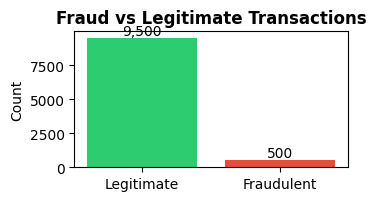

In [53]:
# Fraud Distribution
ax1 = plt.subplot(3, 3, 1)
fraud_counts = df['is_fraud'].value_counts()
colors = ['#2ecc71', '#e74c3c']
ax1.bar(['Legitimate', 'Fraudulent'], fraud_counts.values, color=colors)
ax1.set_title('Fraud vs Legitimate Transactions', fontweight='bold', fontsize=12)
ax1.set_ylabel('Count')
for i, v in enumerate(fraud_counts.values):
    ax1.text(i, v, f'{v:,}', ha='center', va='bottom')

In [54]:
# Fraud by Transaction Type


[None, None, None, None, None, None, None, None]

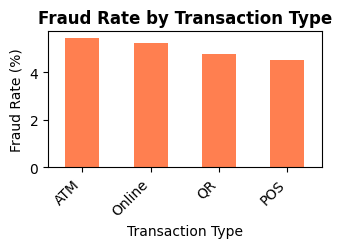

In [55]:
ax2 = plt.subplot(3, 3, 2)
fraud_by_type['Fraud_Rate'].plot(kind='bar', color='coral', ax=ax2)
ax2.set_title('Fraud Rate by Transaction Type', fontweight='bold', fontsize=12)
ax2.set_ylabel('Fraud Rate (%)')
ax2.set_xlabel('Transaction Type')
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

Text(0.5, 0, 'Fraud Rate (%)')

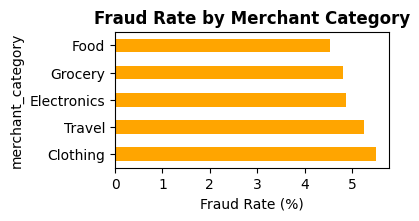

In [56]:
# Fraud by Merchant Category
ax3 = plt.subplot(3, 3, 3)
fraud_by_merchant['Fraud_Rate'].plot(kind='barh', color='orange', ax=ax3)
ax3.set_title('Fraud Rate by Merchant Category', fontweight='bold', fontsize=12)
ax3.set_xlabel('Fraud Rate (%)')

(0.0, 207.55756260342199)

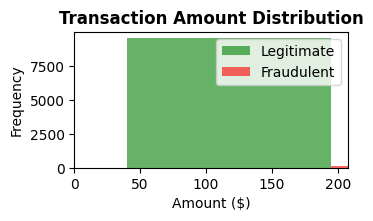

In [57]:
# Amount Distribution
ax4 = plt.subplot(3, 3, 4)
ax4.hist([df[df['is_fraud']==0]['amount'], df[df['is_fraud']==1]['amount']], 
         bins=30, label=['Legitimate', 'Fraudulent'], color=['green', 'red'], alpha=0.6)
ax4.set_title('Transaction Amount Distribution', fontweight='bold', fontsize=12)
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('Frequency')
ax4.legend()
ax4.set_xlim(0, df['amount'].quantile(0.95))

[Text(0, 0, 'NG'),
 Text(1, 0, 'US'),
 Text(2, 0, 'UK'),
 Text(3, 0, 'TR'),
 Text(4, 0, 'FR'),
 Text(5, 0, 'DE')]

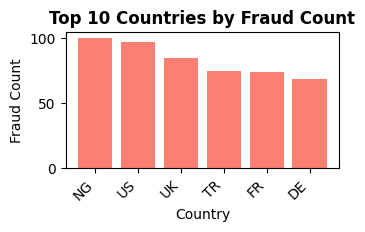

In [58]:
# Fraud by Country
ax6 = plt.subplot(3, 3, 6)
top_countries = fraud_by_country.nlargest(10, 'Fraud_Count')
ax6.bar(range(len(top_countries)), top_countries['Fraud_Count'], color='salmon')
ax6.set_title('Top 10 Countries by Fraud Count', fontweight='bold', fontsize=12)
ax6.set_xlabel('Country')
ax6.set_ylabel('Fraud Count')
ax6.set_xticks(range(len(top_countries)))
ax6.set_xticklabels(top_countries.index, rotation=45, ha='right')


✓ Saved: fraud_analysis_dashboard.png


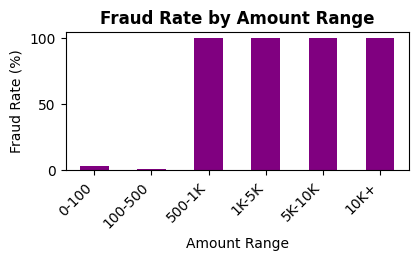

In [59]:
# Fraud by Amount Range
ax9 = plt.subplot(3, 3, 9)
fraud_by_amount['Fraud_Rate'].plot(kind='bar', color='purple', ax=ax9)
ax9.set_title('Fraud Rate by Amount Range', fontweight='bold', fontsize=12)
ax9.set_ylabel('Fraud Rate (%)')
ax9.set_xlabel('Amount Range')
plt.setp(ax9.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('fraud_analysis_dashboard.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: fraud_analysis_dashboard.png")

In [60]:
from sqlalchemy import create_engine

# Step 1: Connect to PostgreSQL
# Replace placeholders with your actual details
username = "postgres"      # default user
password = "1234" # the password you set during installation
host = "localhost"         # if running locally
port = "5432"              # default PostgreSQL port
database = "financial_fraud_analysis"    # the database you created in pgAdmin

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

# Step 2: Load DataFrame into PostgreSQL
table_name = "financial_fraud"   # choose any table name
df.to_sql(table_name, engine, if_exists="replace", index=False)

print(f"Data successfully loaded into table '{table_name}' in database '{database}'.")

Data successfully loaded into table 'financial_fraud' in database 'financial_fraud_analysis'.
